#**Assignment-2**

**Name**- Prashant Singh

**Enrollment No.**- SAU/CS/Mtech(CS)/2024/04

**Course**- Data Mining

**Questions**:


*   Implement PCA
*   State Advantages of PCA
*   State Disadvantages of PCA



In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
dataset1= np.genfromtxt('/content/diabetes.csv',delimiter=',',skip_header=1)
print(f"Dataset before normalization:\n{dataset1}")
print(f"Shape of the dataset: \n{dataset1.shape}")

Dataset before normalization:
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
Shape of the dataset: 
(768, 9)


In [ ]:
def mean(dataset):
  mean=sum(dataset)/len(dataset)
  zero_mean=dataset-mean
  return zero_mean
zero_mean_data=mean(dataset1)
print(f"Dataset after centering mean:\n{zero_mean_data}")

Dataset after centering mean:
[[  2.15494792  27.10546875   2.89453125 ...   0.1551237   16.75911458
    0.65104167]
 [ -2.84505208 -35.89453125  -3.10546875 ...  -0.1208763   -2.24088542
   -0.34895833]
 [  4.15494792  62.10546875  -5.10546875 ...   0.2001237   -1.24088542
    0.65104167]
 ...
 [  1.15494792   0.10546875   2.89453125 ...  -0.2268763   -3.24088542
   -0.34895833]
 [ -2.84505208   5.10546875  -9.10546875 ...  -0.1228763   13.75911458
    0.65104167]
 [ -2.84505208 -27.89453125   0.89453125 ...  -0.1568763  -10.24088542
   -0.34895833]]


In [ ]:
print(f"Shape of the dataset after centering mean : {zero_mean_data.shape}")

Shape of the dataset after centering mean : (768, 9)


In [ ]:
covariance_mat= np.dot(zero_mean_data.T,zero_mean_data)
print(f"Covariance matrix:\n{covariance_mat}")

Covariance matrix:
[[ 8.70856120e+03  1.06974492e+04  7.06755078e+03 -3.36716146e+03
  -2.19018620e+04  3.60316797e+02 -2.87057201e+01  1.65446654e+04
   2.73526042e+02]
 [ 1.06974492e+04  7.84064457e+05  7.24285430e+04  2.24264531e+04
   9.36457758e+05  4.27425988e+04  1.11588898e+03  7.59965117e+04
   5.45726562e+03]
 [ 7.06755078e+03  7.24285430e+04  2.87354457e+05  4.91105469e+04
   1.52156242e+05  3.29846012e+04  2.02977020e+02  4.18194883e+04
   4.60734375e+02]
 [-3.36716146e+03  2.24264531e+04  4.91105469e+04  1.95180979e+05
   6.15885615e+05  3.78697578e+04  7.45627964e+02 -1.63992448e+04
   4.36229167e+02]
 [-2.19018620e+04  9.36457758e+05  1.52156242e+05  6.15885615e+05
   1.01866651e+07  1.37887557e+05  5.42014395e+03 -4.38289036e+04
   5.50373958e+03]
 [ 3.60316797e+02  4.27425988e+04  3.29846012e+04  3.78697578e+04
   1.37887557e+05  4.76767077e+04  2.81799395e+02  2.57737305e+03
   8.44189063e+02]
 [-2.87057201e+01  1.11588898e+03  2.02977020e+02  7.45627964e+02
   5.4201

In [ ]:
print(f"Shape of the covariance matrix: {covariance_mat.shape}")

Shape of the covariance matrix: (9, 9)


In [ ]:
def compute_eigenvectors(cov_matrix):
    dim = len(cov_matrix)
    eigenvectors = []
    eigenvalues = []

    while len(eigenvalues) < dim:
        vec = [random.random() for _ in range(dim)]
        for _ in range(100):
            vec = [sum(cov_matrix[i][j] * vec[j] for j in range(dim)) for i in range(dim)]
            norm = sum(x**2 for x in vec) ** 0.5
            vec = [x / norm for x in vec]

        eigenvalue = sum(vec[i] * sum(cov_matrix[i][j] * vec[j] for j in range(dim)) for i in range(dim))
        eigenvectors.append(vec)
        eigenvalues.append(eigenvalue)

        cov_matrix = [[cov_matrix[i][j] - eigenvalue * vec[i] * vec[j] for j in range(dim)] for i in range(dim)]

    return eigenvectors, eigenvalues

eigenvectors, eigenvalues = compute_eigenvectors(covariance_mat)
print(f"Eigenvectors:\n{eigenvectors}")
print(f"Eigenvalues:\n{eigenvalues}")


Eigenvectors:
[[-0.00202174881489664, 0.09781185635714008, 0.016093070816339053, 0.060756678645011324, 0.9931106435459305, 0.014010850315444074, 0.0005371688567809971, -0.0035646812327600106, 0.000585325534008694], [0.022650077405714075, 0.9721857783937302, 0.1419012984789698, -0.05785593042755178, -0.0946290071969914, 0.04697725378646622, 0.0008169207365115605, 0.14016838275484247, 0.007010337141176409], [0.022464787931799325, -0.14342506396936852, 0.9224681188410796, 0.30701201700763897, -0.02097741727441062, 0.13244401181249704, 0.0006399702703638377, 0.12545438183422117, -0.0003093208946736404], [-0.04904101790090911, 0.11980411638477213, -0.2627494073341259, 0.8843713038732008, -0.06554944544389166, 0.19281068295001594, 0.00269930195367967, -0.30100703254122346, 0.0026246835472445895], [-0.15161956426883133, 0.08799463262912163, 0.23215957466543855, -0.2599268355112237, 0.00016853973102660136, -0.021518477229605943, -0.0016415180010197128, -0.920491752915097, -0.006131019303669831

In [ ]:
def pc_to_retain(eigenvectors, eigenvalues, variance_threshold):
    total_variance = sum(eigenvalues)
    cumulative_variance = 0
    retained_vectors = []
    sorted_eigenvalues = []

    eigenvalues=np.array(eigenvalues)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = [eigenvectors[i] for i in sorted_indices]

    for eigenvalue, vector in zip(sorted_eigenvalues, sorted_eigenvectors):
        cumulative_variance += eigenvalue
        retained_vectors.append(vector)
        if cumulative_variance / total_variance >= variance_threshold:
            break

    return retained_vectors, sorted_eigenvalues[:len(retained_vectors)]

principal_components, sorted_eigenvalues_retained = pc_to_retain(eigenvectors, eigenvalues, variance_threshold=0.95)

print("Principal Components:")
for v in principal_components:
    print(v)


Principal Components:
[-0.00202174881489664, 0.09781185635714008, 0.016093070816339053, 0.060756678645011324, 0.9931106435459305, 0.014010850315444074, 0.0005371688567809971, -0.0035646812327600106, 0.000585325534008694]
[0.022650077405714075, 0.9721857783937302, 0.1419012984789698, -0.05785593042755178, -0.0946290071969914, 0.04697725378646622, 0.0008169207365115605, 0.14016838275484247, 0.007010337141176409]


In [ ]:
projected_data = np.dot(zero_mean_data, np.array(principal_components).T)
print(f"Projected Data:\n{projected_data}")

Projected Data:
[[-75.71424916  35.95494354]
 [-82.35846646 -28.90955895]
 [-74.63022933  67.90963328]
 ...
 [ 32.11298721  -3.37922193]
 [-80.21409513  14.19059537]
 [-81.30834662 -21.6230423 ]]


#**Adavantages of PCA**

**1. Dimensionality Reduction**

In [ ]:
print(f"Shape of the original data: {dataset1.shape}")
print(f"Shape of the projected data: {projected_data.shape}")

Shape of the original data: (768, 9)
Shape of the projected data: (768, 2)


Visually

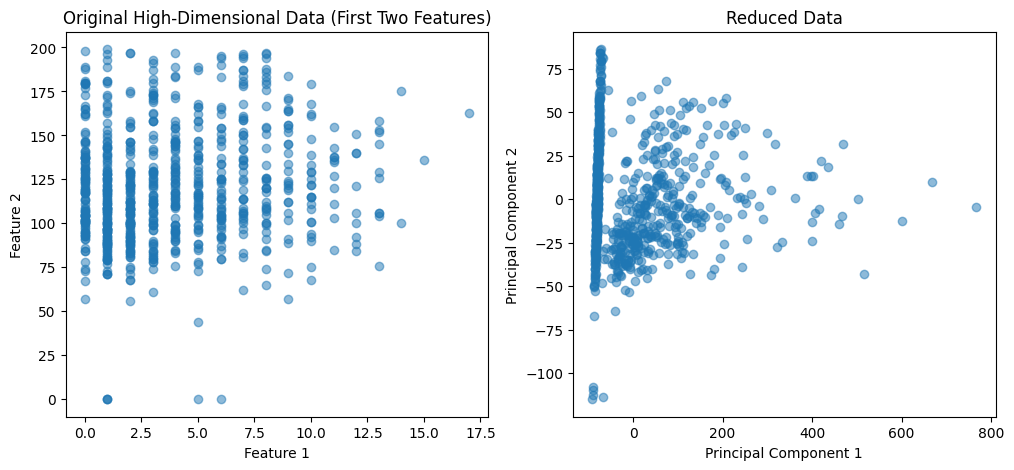

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(dataset1[:, 0], dataset1[:, 1], alpha=0.5)
plt.title('Original High-Dimensional Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(projected_data[:, 0],projected_data[:, 1], alpha=0.5)
plt.title('Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


**2. Noise Reduction**

In [ ]:
total_variance = np.sum(eigenvalues)
explained_variance_ratio = sorted_eigenvalues_retained/ total_variance
print(f'Total Variance in Original Data: {total_variance:.2f}')
print(f'Explained Variance Ratio for Each Principal Component: {explained_variance_ratio}')

Total Variance in Original Data: 11615987.40
Explained Variance Ratio for Each Principal Component: [0.88853359 0.06159289]


**3. Feature Extraction**

In [ ]:
print("Principal Components:")
for v in principal_components:
    print(v)

Principal Components:
[-0.00202174881489664, 0.09781185635714008, 0.016093070816339053, 0.060756678645011324, 0.9931106435459305, 0.014010850315444074, 0.0005371688567809971, -0.0035646812327600106, 0.000585325534008694]
[0.022650077405714075, 0.9721857783937302, 0.1419012984789698, -0.05785593042755178, -0.0946290071969914, 0.04697725378646622, 0.0008169207365115605, 0.14016838275484247, 0.007010337141176409]


#**Disadvantages of PCA**

**1. Loss of information**

In [ ]:
information_loss = (total_variance - np.sum(sorted_eigenvalues_retained)) / total_variance * 100
print(f'Loss of Information: {information_loss:.2f}%')

Loss of Information: 4.99%


**2. Senstivity to scaling**

In [ ]:
dataset1[:, 0] = dataset1[:, 0] * 100  #scaling 1st feature
scaled_dataset = dataset1
scaled_centered_data = mean(scaled_dataset)

scaled_cov_matrix = np.dot(scaled_dataset.T,scaled_centered_data)

scaled_eigenvectors, scaled_eigenvalues = compute_eigenvectors(scaled_cov_matrix)
scaled_principal_components, scaled_sorted_eigenvalues_retained = pc_to_retain(scaled_eigenvectors, scaled_eigenvalues, variance_threshold=0.95)

projected_data_scaled = np.dot(scaled_centered_data, np.array(scaled_principal_components).T)
print(f"Shape of Non-Scaled Projected Data:\n{projected_data.shape}")
print(f"Shape of Scaled Projected Data:\n{projected_data_scaled.shape}")


Shape of Non-Scaled Projected Data:
(768, 2)
Shape of Scaled Projected Data:
(768, 1)


As we can see scaling only one feature and keeping the same threshold value is now returning only 1 pricipal component.